In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io, signal
import os

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

In [9]:
J = lambda u,t: (25-np.power((5-u-np.sin(t)),2)) 
u = 0
y0 = J(u,0)

In [10]:
## Extremum Seeking Control Parameters
freq = 100 # sample frequency
dt = 1/freq
T = 100 # total period of simulation (in seconds)
A = 0.2 # amplitude
omega = 10*2*np.pi # 10 Hz
phase = 0
K = 5 # Integration gain

In [11]:
## High pass filter (Butterworth filter)
butterorder = 1
butterfreq = 2 # in Hz
butterfreq = butterfreq/(freq/2) # normalize to Nyquist frequency
b,a = signal.butter(butterorder,butterfreq,'highpass')
ys = np.zeros(butterorder+1)+y0
HPF = np.zeros(butterorder+1)

uhat = u
yvals = np.zeros(int(T/dt))
uhats = np.zeros_like(yvals)
uvals = np.zeros_like(yvals)
for ii in range(int(T/dt)):
    t = ii*dt
    yvals[ii] = J(u,t)
    for k in range(butterorder):
        ys[k] = ys[k+1]
        HPF[k] = HPF[k+1]
    ys[butterorder] = yvals[ii]
    HPFnew = 0
    for k in range(butterorder+1):
        HPFnew = HPFnew + b[k]*ys[butterorder-k]
    for k in range(1,butterorder+1):
        HPFnew = HPFnew - a[k]*HPF[butterorder-k]
    
    HPF[butterorder] = HPFnew
    
    xi = HPFnew*np.sin(omega*t + phase)
    uhat = uhat + xi*K*dt
    u = uhat + A*np.sin(omega*t + phase)
    uhats[ii] = uhat
    uvals[ii] = u

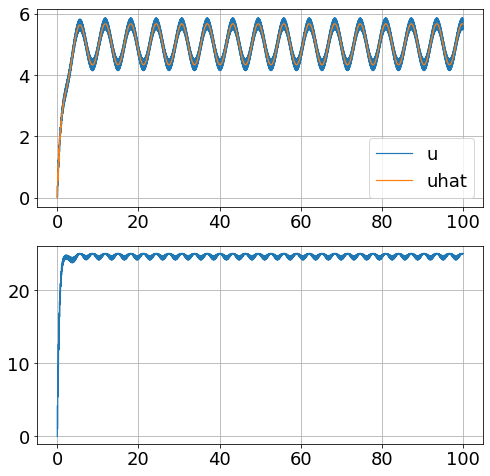

In [12]:
## Figures
tspan = dt*np.arange(int(T/dt))
fig,axs = plt.subplots(2,1)
axs[0].plot(tspan,uvals,linewidth=1.2,label='u')
axs[0].plot(tspan,uhats,linewidth=1.2,label='uhat')
axs[0].legend()
axs[0].grid()

axs[1].plot(tspan,yvals,linewidth=1.2)
axs[1].grid()
axs[1].set_ylim(-1,26)

plt.show()